# Clasificación de videojuegos por popularidad. | Bosques aleatorios (Random Forest)

Descripción:
Clasifica videojuegos como "muy populares" , "moderadamente populares" o "menos
populares" basándote en ventas, calificaciones y datos de usuarios activos.

In [1]:
# Importamos las librerias necesarias
import pandas as pd 
import numpy as np 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns 

### Cargamos el Dataset 

In [2]:
# Cargar el dataset 
file_path = "juegos.csv"
df = pd.read_csv(file_path)

# Mostrar las primeras filas 
print(df.head())

                                             img                        title  \
0  /games/boxart/full_6510540AmericaFrontccc.jpg           Grand Theft Auto V   
1  /games/boxart/full_5563178AmericaFrontccc.jpg           Grand Theft Auto V   
2                    /games/boxart/827563ccc.jpg  Grand Theft Auto: Vice City   
3  /games/boxart/full_9218923AmericaFrontccc.jpg           Grand Theft Auto V   
4  /games/boxart/full_4990510AmericaFrontccc.jpg    Call of Duty: Black Ops 3   

  console    genre       publisher       developer  critic_score  total_sales  \
0     PS3   Action  Rockstar Games  Rockstar North           9.4        20.32   
1     PS4   Action  Rockstar Games  Rockstar North           9.7        19.39   
2     PS2   Action  Rockstar Games  Rockstar North           9.6        16.15   
3    X360   Action  Rockstar Games  Rockstar North           NaN        15.86   
4     PS4  Shooter      Activision        Treyarch           8.1        15.09   

   na_sales  jp_sales  pal

### Explorar el Dataset y limpieza de datos

In [3]:
# Informacion del dataset
print(df.info())

# Eliminar duplicados
df = df.drop_duplicates()

# Eliminar valores nulos 
df = df.dropna()

# Estadísiticas del dataset
print(df.describe())

# Visualizar las columas
print("Columnas disponibles: ", df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB
None
       critic_score  total_sales    na_sales    jp_sales   pal_sales  \
count    282.000000   282.000000  282.000000  282.000000  282.000000   
me

### Etiquetas de popularidad 

In [5]:
# Crear etiquetas de popularidad basadas en Global_Sales
def clasificar_popularidad(ventas):
    if ventas > 5.0:
        return "Muy popular"
    elif 1.0 < ventas <= 5.0:
        return "Moderadamente popular"
    else:
        return "Menos popular"

df["Popularidad"] = df["total_sales"].apply(clasificar_popularidad)

# Verificar la distribución de las categorías
print(df["Popularidad"].value_counts())

Popularidad
Menos popular            175
Moderadamente popular     79
Muy popular               28
Name: count, dtype: int64


### Características relevantes

In [11]:
# Selección de características relevantes
caracteristicas = ["na_sales", "pal_sales", "jp_sales", "other_sales", "critic_score"]
X = df[caracteristicas]
y = df["Popularidad"]

# Verificar las dimensiones de los datos
print("Dimensiones de X:", X.shape)
print("Dimensiones de y:", y.shape)

Dimensiones de X: (282, 5)
Dimensiones de y: (282,)


### Entrenamiento y prueba

In [12]:
# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (225, 5)
Tamaño del conjunto de prueba: (57, 5)


### Modelo Random Forest 

In [13]:
# Crear y entrenar el modelo Random Forest
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Evaluar modelo 

In [14]:
# Realizar predicciones en el conjunto de prueba
y_pred = modelo_rf.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

Accuracy: 0.9473684210526315

Reporte de clasificación:
                        precision    recall  f1-score   support

        Menos popular       1.00      0.95      0.97        37
Moderadamente popular       0.83      1.00      0.91        15
          Muy popular       1.00      0.80      0.89         5

             accuracy                           0.95        57
            macro avg       0.94      0.92      0.92        57
         weighted avg       0.96      0.95      0.95        57



### Análisis 

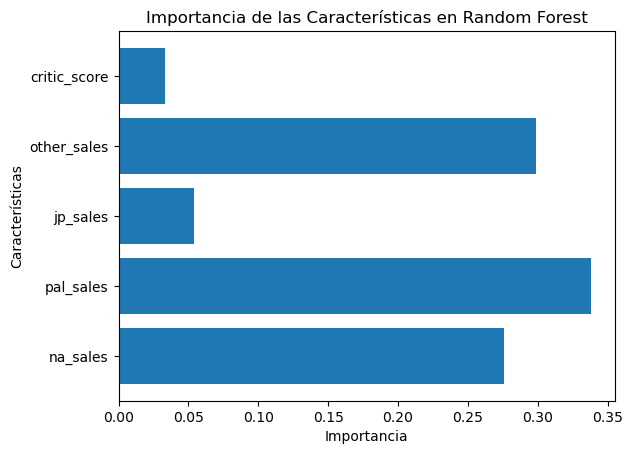

In [15]:
# Importancia de las características
importancia = modelo_rf.feature_importances_
plt.barh(caracteristicas, importancia)
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.title("Importancia de las Características en Random Forest")
plt.show()

### Predicción 

In [17]:
# Datos de ejemplo (na_sales, pal_sales, jp_sales, other_sales, critic_score)
videojuego_nuevo = [[2.5, 1.2, 0.3, 0.1, 85]]

# Predicción
popularidad_predicha = modelo_rf.predict(videojuego_nuevo)
print(f"Predicción para el videojuego nuevo: {popularidad_predicha[0]}")

# Nueva predicción
videojuego_nuevo = [[0.5, 0.2, 0.1, 0.1, 70]]
popularidad_predicha = modelo_rf.predict(videojuego_nuevo)
print(f"Predicción para el videojuego nuevo: {popularidad_predicha[0]}")

Predicción para el videojuego nuevo: Moderadamente popular
Predicción para el videojuego nuevo: Menos popular


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
